# Initialize parameters

In [1]:
using CSV
using DataFrames

# Initialize parameters
sub_n = 6 # subject number
grid_size = Dict(
    1=>"8X8",
    2=>"4X6",
    3=>"6X8",
    5=>"5X8",
    6=>"6X8"
)
location_of_points = ["corner","edge","center"] # Three choices of location
# Select the error type (1 - 3)
err_type = 4 
file_suffix = ["GridFitErrbyDist_nearestFP","GridFitErrbyDist_centroidFP","GridFitErrbyDist","GridFitErr_V6"] # Error data organized in two ways

4-element Vector{String}:
 "GridFitErrbyDist_nearestFP"
 "GridFitErrbyDist_centroidFP"
 "GridFitErrbyDist"
 "GridFitErr_V6"

In [2]:
function combine_std_byPoints(err_data::DataFrame,pt::Int64,dist_str::String,grp_avg::Float64)   
    comb_Stdev = 0.0
    Stdev_byPoints = 0.0
    count_byPoints = 0
    for row in 1:nrow(err_data)
        if (err_data[row,"points"]==pt)
            if (err_data[row,"count_"*dist_str]>1)
                Stdev_byPoints+=err_data[row,"count_"*dist_str]*(err_data[row,"stdErr_"*dist_str]^2+(err_data[row,"avgErr_"*dist_str]-grp_avg)^2)
                count_byPoints+=err_data[row,"count_"*dist_str]
            end
        end
    end
    comb_Stdev = sqrt(Stdev_byPoints/count_byPoints)
    comb_Stderr = comb_Stdev/sqrt(count_byPoints)
    return comb_Stderr,count_byPoints
end

combine_std_byPoints (generic function with 1 method)

In [3]:
function combine_mean_byPoints(err_data::DataFrame,pt::Int64,dist_str::String)   
    AvgErr_byPoints = 0.0
    count_byPoints = 0
    for row in 1:nrow(err_data)
        if (err_data[row,"points"]==pt)
            if (err_data[row,"count_"*dist_str]>0)
                AvgErr_byPoints+=err_data[row,"count_"*dist_str]*err_data[row,"avgErr_"*dist_str]
                count_byPoints+=err_data[row,"count_"*dist_str]
            end
        end
    end
    comb_AvgErr = AvgErr_byPoints/count_byPoints
    return comb_AvgErr,count_byPoints
end

combine_mean_byPoints (generic function with 1 method)

In [4]:
function combine_max_byPoints(err_data::DataFrame,pt::Int64,dist_str::String)   
    comb_MaxErr = 0
    for row in 1:nrow(err_data)
        if (err_data[row,"points"]==pt)
            if ((err_data[row,"count_"*dist_str]>0)&&(maximum(err_data[row,"maxErr_"*dist_str]>comb_MaxErr)))
                comb_MaxErr = maximum(err_data[row,"maxErr_"*dist_str])
            end
        end
    end
    return comb_MaxErr
end

combine_max_byPoints (generic function with 1 method)

# Draw grouped plot from the final dataset

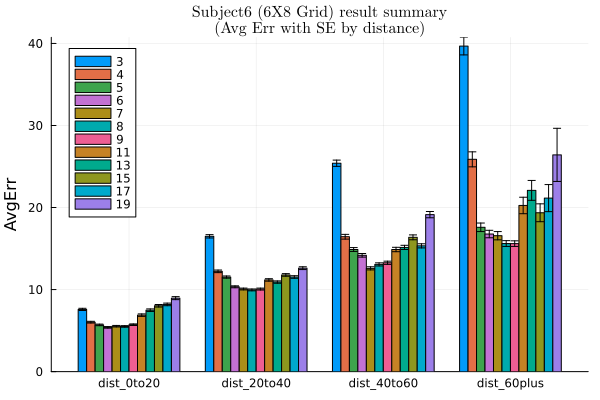

In [5]:
using DataFrames
using CSV 
using Statistics 
using StatsPlots 
using Plots

# Read the first CSV file containing error data
err_data = DataFrame(CSV.File("sub"*string(sub_n)*"_"*file_suffix[err_type]*".csv"))

grp_avg_std_max = DataFrame([[],[],[],[],[],[]],["points","dist","avgErr","stdErr","maxErr","countErr"])

for pt in [3,4,5,6,7,8,9,11,13,15,17,19] # number of initial points
    # for dist_str in ["short","mid","long"] # use this line for V4
    for dist_str in ["dist_0to20","dist_20to40","dist_40to60","dist_60plus"]
        avgErrbyDist = combine_mean_byPoints(err_data,pt,dist_str)
        stdErrbyDist = combine_std_byPoints(err_data,pt,dist_str,avgErrbyDist[1])
        maxErrbyDist = combine_max_byPoints(err_data,pt,dist_str)
        countErrbyDist = avgErrbyDist[2]
        push!(grp_avg_std_max,[pt dist_str avgErrbyDist[1] stdErrbyDist[1] maxErrbyDist countErrbyDist])
    end
end
grp_avg_std_max=identity.(grp_avg_std_max)
    
# Plot data by group
grp1 = grp_avg_std_max[:,"dist"]
grp2 = grp_avg_std_max[:,"points"]

plotAvgErr = groupedbar(grp1, grp_avg_std_max[:,"avgErr"], yerr = grp_avg_std_max[:,"stdErr"], group = grp2, ylabel = "AvgErr",
        title = "Subject"*string(sub_n)*" ("*string(grid_size[sub_n])*" Grid) result summary\n(Avg Err with SE by distance)",titlefont = font(10,"Computer Modern"))

# Save plot in png format

In [6]:
savefig("sub"*string(sub_n)*"_fig_"*file_suffix[err_type]*".png")

"/mnt/data/msaber/git/data/GridFit_dataV6/sub6_fig_GridFitErr_V6.png"

# Save grouped stat in CSV file

In [7]:
CSV.write("sub"*string(sub_n)*"_stats_"*file_suffix[err_type]*".csv", grp_avg_std_max)

"sub6_stats_GridFitErr_V6.csv"